In [47]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npa

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | sarab
Processing Record 3 of Set 1 | cosmopolis
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | gambo
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | auki
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | la orilla
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | calnali
Processing Record 16 of Set 1 | pochutla
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | faridnagar
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of

In [9]:
len(city_data)


587

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,82.27,84,75,3.44,US,2022-04-13 00:04:20
1,Sarab,38.6066,44.9883,48.69,48,0,1.03,IR,2022-04-13 00:07:22
2,Cosmopolis,-22.6458,-47.1961,70.97,89,91,0.63,BR,2022-04-13 00:07:23
3,Busselton,-33.6500,115.3333,58.41,75,0,9.33,AU,2022-04-13 00:07:23
4,Lorengau,-2.0226,147.2712,84.42,68,18,5.39,PG,2022-04-13 00:07:23
5,Gambo,4.6482,22.2633,71.46,79,22,0.98,CF,2022-04-13 00:07:24
6,Bredasdorp,-34.5322,20.0403,65.10,75,89,3.42,ZA,2022-04-13 00:06:12
7,Chuy,-33.6971,-53.4616,59.29,75,75,6.29,UY,2022-04-13 00:07:24
8,Narsaq,60.9167,-46.0500,43.02,55,99,9.04,GL,2022-04-13 00:05:30
9,Auki,-8.7676,160.7034,86.29,56,81,2.42,SB,2022-04-13 00:07:24


In [11]:
new_column_order = ["City" , "Country" , "Date" , "Humidity" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]

In [12]:
new_column_order


['City',
 'Country',
 'Date',
 'Humidity',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [13]:
import pandas as pd

In [14]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,82.27,84,75,3.44,US,2022-04-13 00:04:20
1,Sarab,38.6066,44.9883,48.69,48,0,1.03,IR,2022-04-13 00:07:22
2,Cosmopolis,-22.6458,-47.1961,70.97,89,91,0.63,BR,2022-04-13 00:07:23
3,Busselton,-33.6500,115.3333,58.41,75,0,9.33,AU,2022-04-13 00:07:23
4,Lorengau,-2.0226,147.2712,84.42,68,18,5.39,PG,2022-04-13 00:07:23


In [20]:
city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-04-13 00:04:20,84,19.7297,-155.0900,82.27,84,75,3.44
1,Sarab,IR,2022-04-13 00:07:22,48,38.6066,44.9883,48.69,48,0,1.03
2,Cosmopolis,BR,2022-04-13 00:07:23,89,-22.6458,-47.1961,70.97,89,91,0.63
3,Busselton,AU,2022-04-13 00:07:23,75,-33.6500,115.3333,58.41,75,0,9.33
4,Lorengau,PG,2022-04-13 00:07:23,68,-2.0226,147.2712,84.42,68,18,5.39


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df.head()

,City_ID,City,Country,Date,Humidity,Lat,Lng,Max Temp,Humidity.1,Cloudiness,Wind Speed
0,0,Hilo,US,2022-04-13 00:04:20,84,19.7297,-155.0900,82.27,84,75,3.44
1,1,Sarab,IR,2022-04-13 00:07:22,48,38.6066,44.9883,48.69,48,0,1.03
2,2,Cosmopolis,BR,2022-04-13 00:07:23,89,-22.6458,-47.1961,70.97,89,91,0.63
3,3,Busselton,AU,2022-04-13 00:07:23,75,-33.6500,115.3333,58.41,75,0,9.33
4,4,Lorengau,PG,2022-04-13 00:07:23,68,-2.0226,147.2712,84.42,68,18,5.39


In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

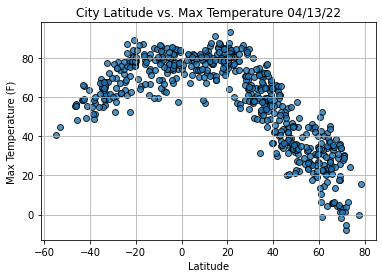

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

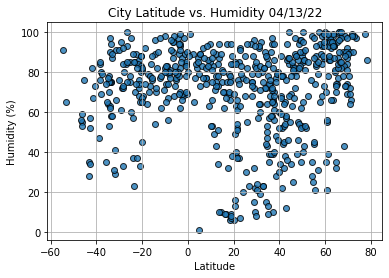

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

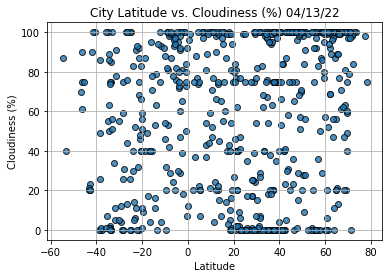

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

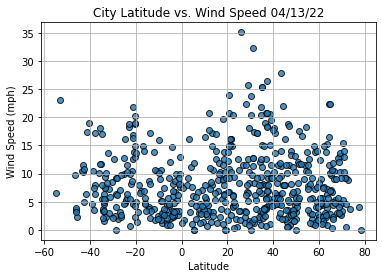

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [2]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [10]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Calnali
Country                        MX
Date          2022-04-13 00:07:25
Humidity                       38
Lat                       20.9167
Lng                      -98.5833
Max Temp                    80.22
Humidity.1                     38
Cloudiness                     81
Wind Speed                   6.67
Name: 13, dtype: object

In [11]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
582    False
583    False
584     True
585     True
586    False
Name: Lat, Length: 587, dtype: bool

In [12]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Humidity,Lat,Lng,Max Temp,Humidity.1,Cloudiness,Wind Speed
0,0,Hilo,US,2022-04-13 00:04:20,84,19.7297,-155.0900,82.27,84,75,3.44
1,1,Sarab,IR,2022-04-13 00:07:22,48,38.6066,44.9883,48.69,48,0,1.03
5,5,Gambo,CF,2022-04-13 00:07:24,79,4.6482,22.2633,71.46,79,22,0.98
8,8,Narsaq,GL,2022-04-13 00:05:30,55,60.9167,-46.0500,43.02,55,99,9.04
10,10,Georgetown,MY,2022-04-13 00:06:00,89,5.4112,100.3354,78.73,89,20,0.00


In [13]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

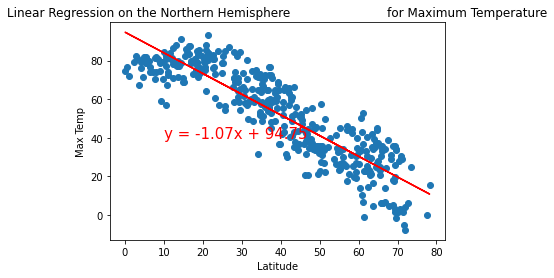

In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

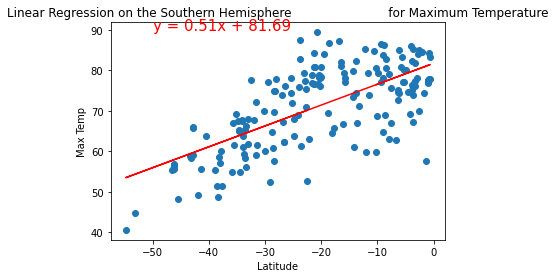

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

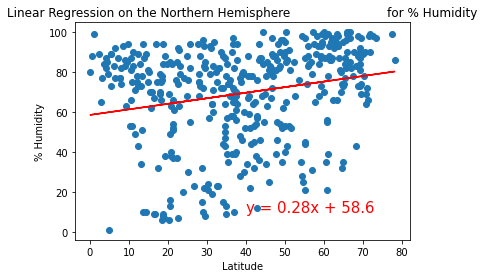

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

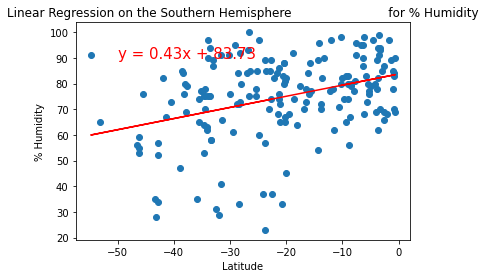

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,90))

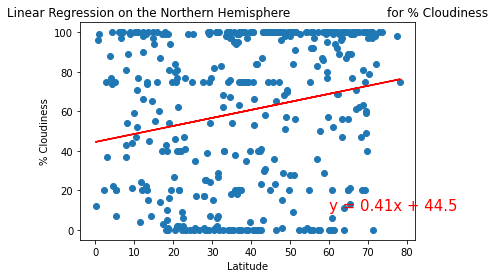

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(60,10))

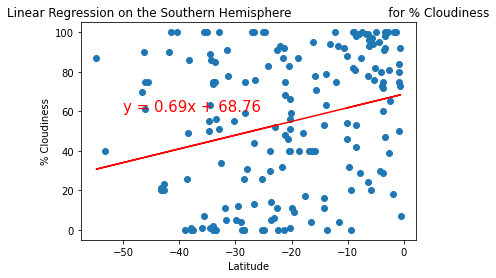

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

TypeError: 'str' object is not callable

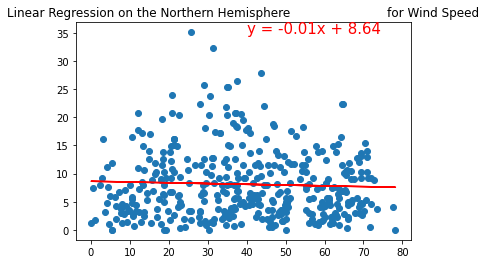

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

TypeError: 'str' object is not callable

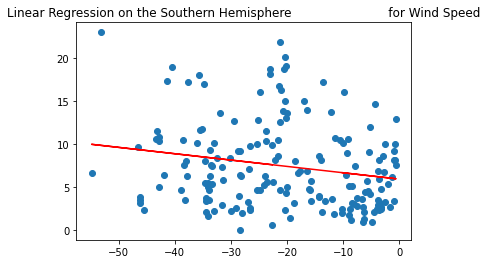

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

TypeError: 'str' object is not callable

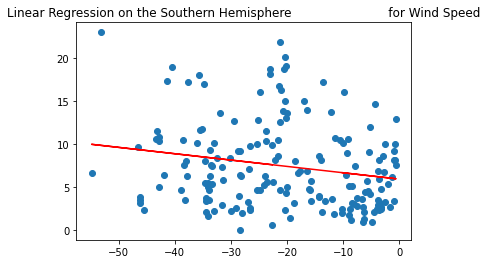